This notebook demosntrate how to analyze the [SMA][SMA] data after running SCrOFit.

In [1]:
%load_ext autoreload

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_76684/844954310.py:22: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.


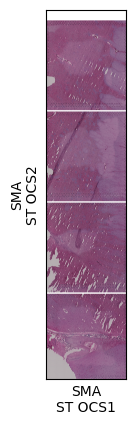

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


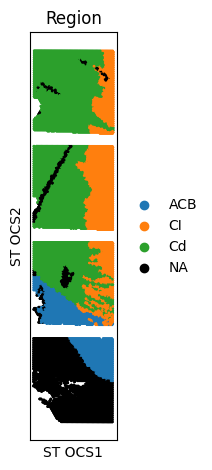

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


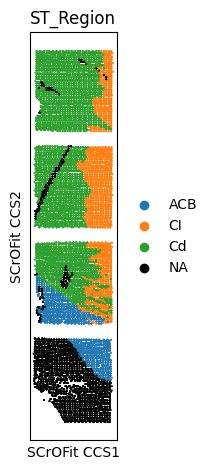

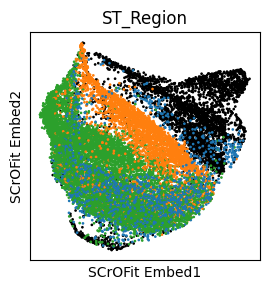

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


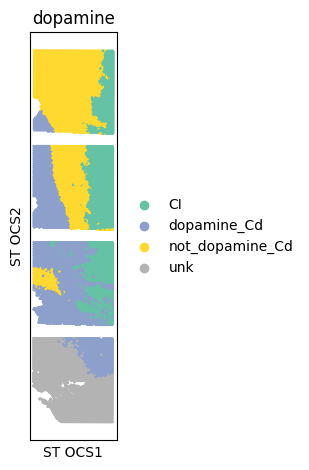

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


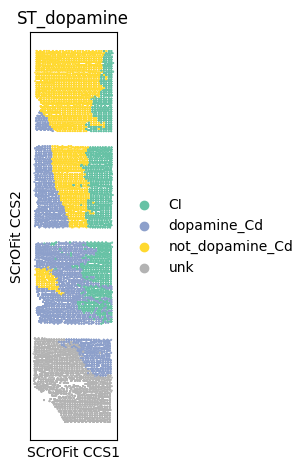

In [4]:
%autoreload
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import squidpy as sq
import numpy as np

import sys
sys.path.append('../../')
import scrofit.plotting as pl

sample = 'V11T17-102'
in_dir = f'../../../data/MSA_data/{sample}'

st_adata = ad.read_h5ad(f'{in_dir}/{sample}_st_pp.adata')
sm_adata = ad.read_h5ad(f'{in_dir}/{sample}_sm_pp.adata')
mdata = ad.read_h5ad(f'{in_dir}/{sample}_m_pp.adata')


sm_adata.obsm['SMA\nSM OCS'] = sm_adata.obsm['spatial']
st_adata.obsm['SMA\nST OCS'] = st_adata.obsm['spatial']
sc.pl.spatial(st_adata, basis='SMA\nST OCS')



mymap = {'unk': np.nan, 'unk2': np.nan}
st_adata.obs['Region'] = st_adata.obs['RegionLoupe'].apply(lambda x: mymap.get(x, x))
pl.ocs_spatial_scatter(st_adata, 'ST', color=['Region'], img=True, shape=None, library_id=sample,
                      size=0.5,
                      out_fn='ocs_region.pdf')

mdata.obs['ST_Region'] = mdata.obs['ST_RegionLoupe'].apply(lambda x: mymap.get(x, x))
pl.ccs_spatial_scatter(mdata, 'ST', color=['ST_Region'], img=True, shape=None, library_id=sample,
                      size=0.5,
                      out_fn='ccs_region.pdf')

pl.embed(mdata, color='ST_Region', figsize=(2.8, 3),
         out_fn='embed_reigon.pdf')
pl.ocs_spatial_scatter(st_adata, 'ST', color=['dopamine'], img=True, shape=None, library_id=sample,
                      size=0.5, palette='Set2',
                      out_fn='ocs_dopamine.pdf')

pl.ccs_spatial_scatter(mdata, 'ST', color=['ST_dopamine'], img=True, shape=None, library_id=sample,
                       size=0.5, palette='Set2', 
                       out_fn='ccs_dopamine.pdf')


In [5]:
sm_adata

AnnData object with n_obs × n_vars = 15813 × 1538
    obs: 'sample', 'block', 'n_genes', 'ST_RegionLoupe', 'ST_MSN.D2.PenkNeg_5', 'ST_MSN.D1.TacNeg_3', 'ST_MSN.D2_C_18', 'ST_MSN.D1.TacPosB_6', 'ST_MSN.D1.TacPosA_9', 'ST_MSN.D2.PenkPos_2', 'ST_ST_id', 'LY6H', 'THY1', 'VSNL1', 'PCDH11X', 'MBP', 'PLP1', 'CHN1', 'SYNPR', 'NCDN', 'MAP2', 'GDA', 'HPCAL4', 'RTN1', 'NNAT', 'TSPAN7', 'PEG10', 'SCG2', 'TF', 'CRYM', 'GFAP', 'MT1G'
    uns: 'spatial'
    obsm: 'XY_spatial_euclidean_dist', 'mappingflow_MCMF', 'spatial', 'spatial_MCMF_map', 'spatial_normalized', 'spatial_rir', 'spatial_rir_filtered', 'SMA\nSM OCS'
    layers: 'log1p', 'raw'

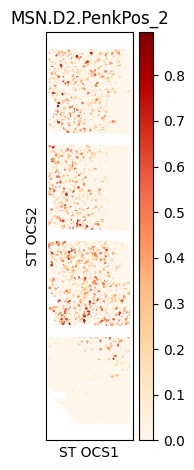

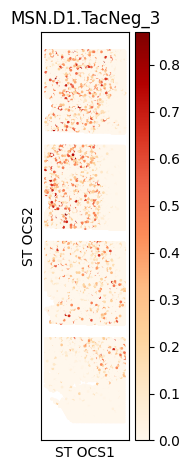

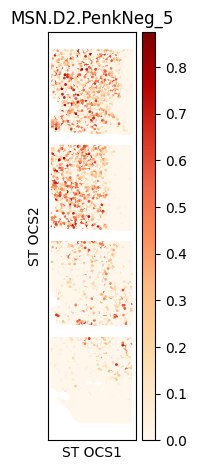

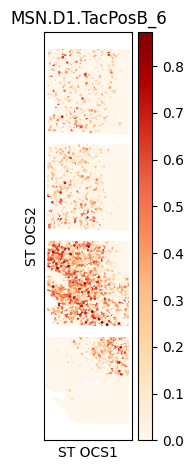

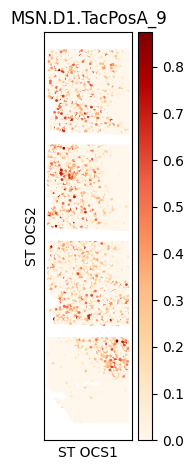

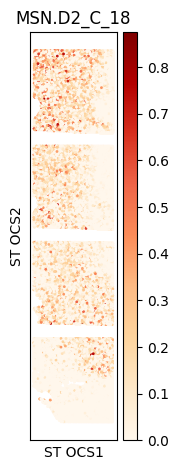

In [9]:
%autoreload
for color in st_adata.obs.columns:
    if not color.startswith('MSN'):
        continue
    pl.ocs_spatial_scatter(st_adata, 'ST', color=color, img=True, shape=None, 
                          library_id=sample, cmap='OrRd', size=0.5,
                          out_fn=f'ocs_{color}.pdf')



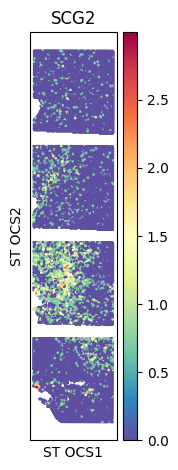

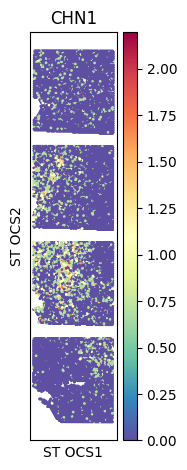

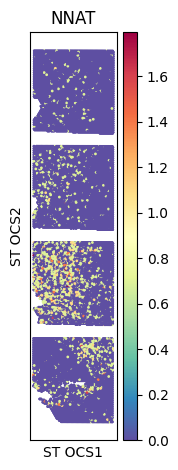

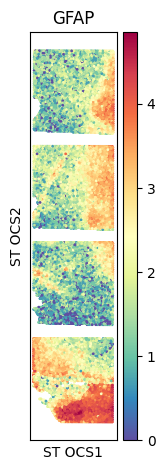

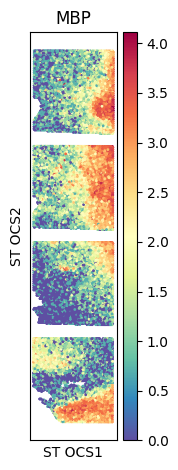

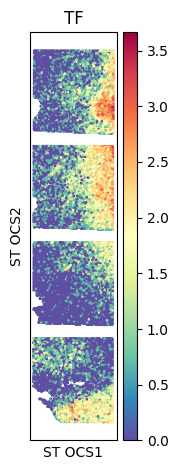

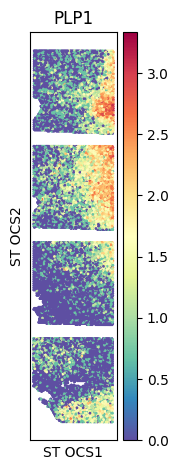

In [10]:
%autoreload
for gene in ['SCG2', 'CHN1', 'NNAT', 'GFAP', 'MBP', 'TF', 'PLP1']:
    pl.ocs_spatial_scatter(st_adata, 'ST', color=gene, img=True, shape=None, 
                          library_id=sample, cmap='Spectral_r', size=0.5,
                          out_fn=f'ocs_{gene}.pdf')


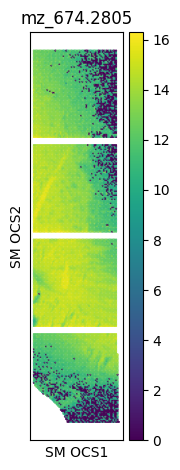

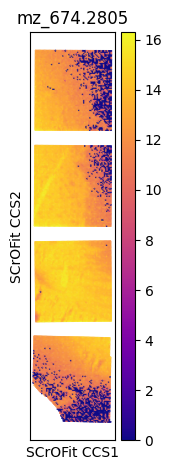

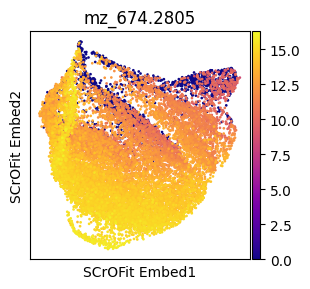

In [11]:
%autoreload
pl.ocs_spatial_scatter(sm_adata, 'SM', color='mz_674.2805', img=False, shape=None, library_id=sample,
                      cmap='viridis', size=0.5,
                      out_fn='ocs_mz_674.2805.pdf')
pl.ccs_spatial_scatter(mdata, 'SM', color='mz_674.2805', img=False, shape=None, library_id=sample,
                      cmap='plasma', size=0.5,
                      out_fn='ccs_mz_674.2805.pdf')


pl.embed(mdata, color='mz_674.2805', cmap='plasma', figsize=(3.2, 3), colorbar_loc='right',
         out_fn='embed_mz_674.2805.pdf')


/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


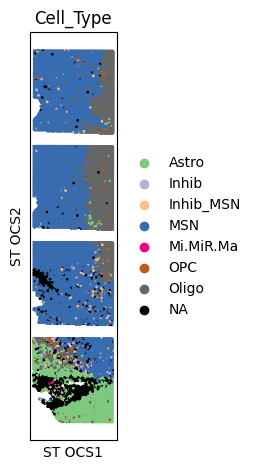

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


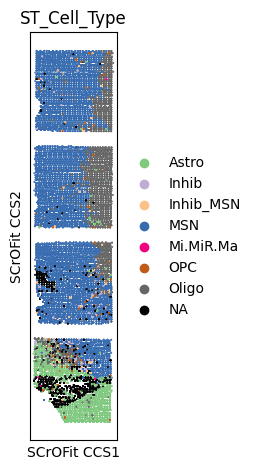

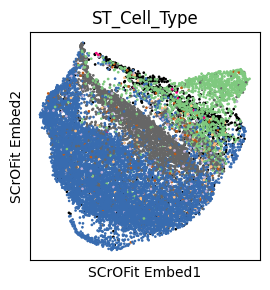

In [12]:
%autoreload

pl.ocs_spatial_scatter(st_adata, 'ST', color=['Cell_Type'], img=True, shape=None, library_id=sample,
                       palette='Accent', size=0.5,
                       out_fn='ocs_cell_type.pdf')
pl.ccs_spatial_scatter(mdata, 'ST', color=['ST_Cell_Type'], img=True, shape=None, library_id=sample,
                       palette='Accent', size=0.5,
                       out_fn='ccs_cell_type.pdf')

pl.embed(mdata, color='ST_Cell_Type', palette='Accent', figsize=(2.8, 3),
         out_fn='embed_cell_type.pdf')

In [8]:
st_adata.obsm

AxisArrays with keys: spatial, spatial_normalized, spatial_rir, spatial_rir_filtered, SMA
ST OCS

In [9]:
mdata.obsm

AxisArrays with keys: SM_XY_spatial_euclidean_dist, SM_mappingflow_MCMF, SM_spatial, SM_spatial_MCMF_map, SM_spatial_normalized, SM_spatial_rir, SM_spatial_rir_filtered, ST_spatial, ST_spatial_normalized, ST_spatial_rir, ST_spatial_rir_filtered, X_pca, X_umap

<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


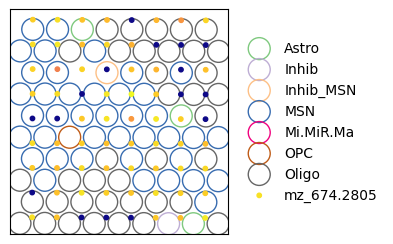

In [15]:
%autoreload

x_min=35000
x_max=x_min+5000
y_min=35000
y_max=y_min+5000

pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805",
    cell_type_col="Cell_Type",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4,4),
    st_cmap="Accent",
    m_cmap='plasma',
    out_fn='ccs_zoom_cell_type.pdf'
)

<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


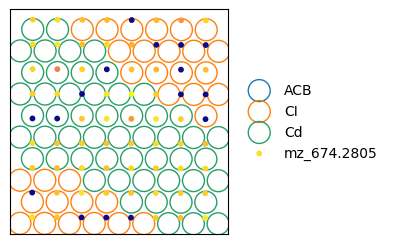

In [14]:
%autoreload

pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805",
    cell_type_col="Region",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    gene_dot_size=10,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4,4),
    st_cmap=None,
    m_cmap='plasma',
    out_fn='ccs_zoom_region.pdf'
)

<string>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 3 x 3 in image.
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: violin_cell_type.pdf


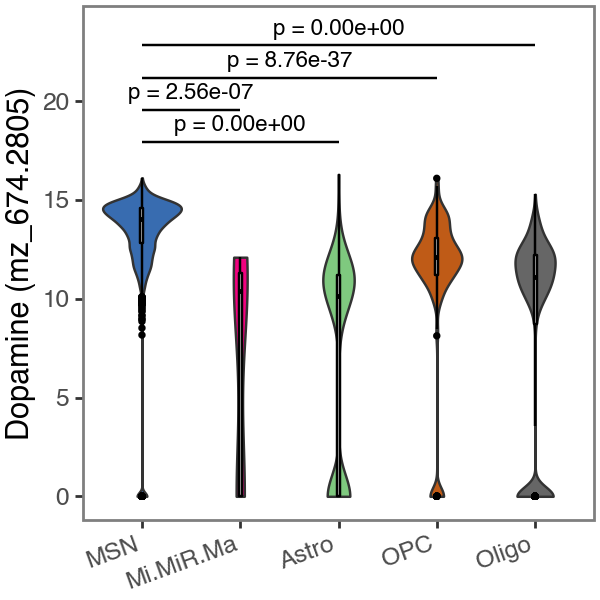

In [17]:
%autoreload
import seaborn as sns
import pandas as pd

dopamine = 'Dopamine (mz_674.2805)'
mymap = {'unk': np.nan, 'unk2': np.nan}
sm_adata.obs['Region'] = sm_adata.obs['ST_RegionLoupe'].apply(lambda x: mymap.get(x, x))
mymap = st_adata.obs['Cell_Type'].to_dict()
sm_adata.obs['Cell_Type'] = sm_adata.obs['ST_ST_id'].apply(lambda x: mymap[x])
sm_adata.obs['New_Cell_Type']  = sm_adata.obs['Cell_Type'].apply(lambda x: np.nan if x in ['Inhib', 'Inhib_MSN'] else x)
custom_order = ['MSN', 'Mi.MiR.Ma', 'Astro', 'OPC', 'Oligo']
sm_adata.obs['New_Cell_Type']  = sm_adata.obs['New_Cell_Type'].astype(pd.CategoricalDtype(categories=custom_order, ordered=True))


sm_adata.obs[dopamine] = dict(zip(sm_adata.obs.index, sm_adata[:, 'mz_674.2805'].X.reshape(-1)))

compare_type = 'New_Cell_Type'
comparisons = [
    ("MSN", "Astro"),    
    ("MSN", "Mi.MiR.Ma"),    
    ("MSN", "OPC"),    
    ("MSN", "Oligo"),     
]
base_colors = sns.color_palette('Accent', 8).as_hex()
palette = dict(zip(np.sort(sm_adata.obs['Cell_Type'].dropna().unique()), base_colors[:3] + base_colors[-4:]))
pl.violin(sm_adata, compare_type, dopamine, comparisons,
             fig_size=(3, 3), 
             palette=palette,
             text_x_angle=20,
             out_fn='violin_cell_type.pdf')

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 3 x 3 in image.
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: violin_region.pdf


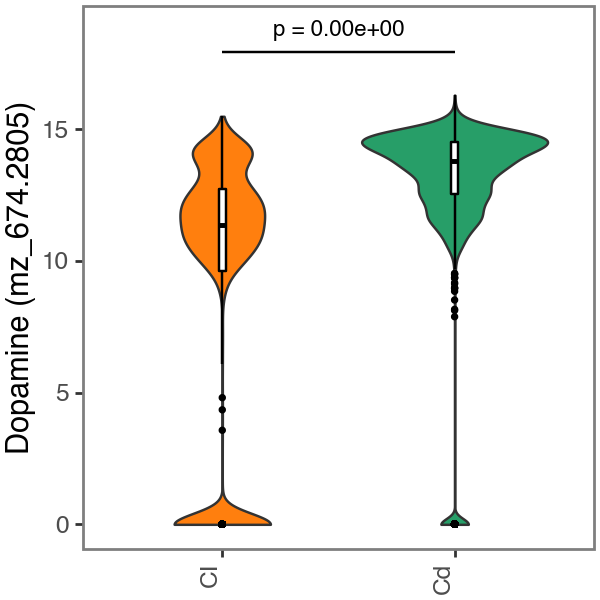

In [18]:
%autoreload
compare_type = 'Region'
comparisons = [
    #("ACB", "CI"),    
    #("ACB", "Cd"),    
    ("Cd", "CI"),    
]
pl.violin(sm_adata[sm_adata.obs['Region'] != 'ACB'], compare_type, dopamine, comparisons,
             fig_size=(3, 3),
             text_x_angle=90,
             palette=sc.pl.palettes.default_20[1:],
             out_fn='violin_region.pdf')

In [19]:
import pandas as pd
df = pd.read_csv('../../../data/MSA_data/corHstr_onlyCdSpots.csv', index_col=0)
SMA_cor_df = df[(df['FDR'] < 0.05) & (df['rho'].abs() > 0.2)]

SMA_cor_df['Region'] = 'Cd'
SMA_cor_df['Method'] = 'SMA'
SMA_cor_df

/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_76684/3254590528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_76684/3254590528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dopamine     gene       rho         Pvalue            FDR     sig  \
348    Dopamine     NCDN  0.244814  8.910519e-101   1.517065e-97  PosCor   
395    Dopamine   HPCAL4  0.210742   1.407301e-74   1.198004e-71  PosCor   
1550   Dopamine    VSNL1  0.236569   4.872488e-94   6.787375e-91  PosCor   
2148   Dopamine     CHN1  0.263871  2.375161e-117  1.819730e-113  PosCor   
2290   Dopamine     MAP2  0.200022   3.214671e-67   2.239018e-64  PosCor   
2368   Dopamine     SCG2  0.326443  4.317302e-182  6.615401e-178  PosCor   
2845   Dopamine    SYNPR  0.255258  1.098729e-109  3.367164e-106  PosCor   
3064   Dopamine       TF -0.234649   1.659563e-92   2.119124e-89  NegCor   
5685   Dopamine    PEG10  0.229432   2.058726e-88   2.253275e-85  PosCor   
6483   Dopamine     LY6H  0.229322   2.504924e-88   2.558863e-85  PosCor   
6715   Dopamine      GDA  0.204074   5.952055e-70   4.343016e-67  PosCor   
8509   Dopamine     THY1  0.250591  1.185839e-105  3.028434e-102  PosCor   
9885   Dopamine     RTN1  0.205265   9.126335e-71   6.992142e-68  PosCor   
10849  Dopamine     CRYM  0.247718  3.268268e-103  7.154239e-100  PosCor   
11027  Dopamine     MT1G  0.212344   1.029377e-75   9.278317e-73  PosCor   
11788  Dopamine     GFAP -0.262491  4.203159e-116  2.146833e-112  NegCor   
12343  Dopamine      MBP -0.246967  1.403670e-102   2.688555e-99  NegCor   
13619  Dopamine     NNAT  0.258008  4.219107e-112  1.616235e-108  PosCor   
14392  Dopamine   TSPAN7  0.239372   2.667464e-96   4.087356e-93  PosCor   
14576  Dopamine  PCDH11X  0.206412   1.480592e-71   1.194059e-68  PosCor   
14624  Dopamine     PLP1 -0.233789   7.979968e-92   9.405927e-89  NegCor   
14768  Dopamine    PNMA5  0.223717   4.790115e-84   4.587434e-81  PosCor   

      corlabel  InvLog10FDR Region Method  
348       NCDN    96.818996     Cd    SMA  
395     HPCAL4    70.921542     Cd    SMA  
1550     VSNL1    90.168298     Cd    SMA  
2148      CHN1   112.739993     Cd    SMA  
2290      MAP2    63.649942     Cd    SMA  
2368      SCG2   177.179444     Cd    SMA  
2845     SYNPR   105.472736     Cd    SMA  
3064        TF    88.673844     Cd    SMA  
5685     PEG10    84.647186     Cd    SMA  
6483      LY6H    84.591953     Cd    SMA  
6715       GDA    66.362209     Cd    SMA  
8509      THY1   101.518782     Cd    SMA  
9885      RTN1    67.155390     Cd    SMA  
10849     CRYM    99.145437     Cd    SMA  
11027     MT1G    72.032531     Cd    SMA  
11788     GFAP   111.668202     Cd    SMA  
12343      MBP    98.570481     Cd    SMA  
13619     NNAT   107.791496     Cd    SMA  
14392   TSPAN7    92.388558     Cd    SMA  
14576  PCDH11X    67.922974     Cd    SMA  
14624     PLP1    88.026598     Cd    SMA  
14768    PNMA5    80.338430     Cd    SMA

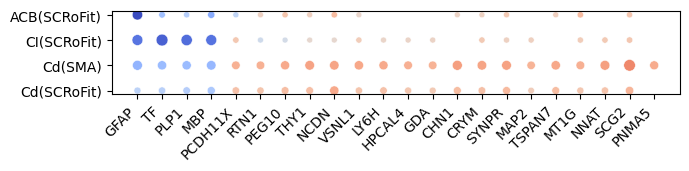

In [20]:

from scipy.stats import pearsonr

data_list = []
for region in sm_adata.obs['Region'].unique():    
    df = sm_adata[sm_adata.obs['Region'] == region].obs
    if df.shape[0] == 0:
        continue
    for gene in SMA_cor_df['gene'].tolist():
        if gene not in df.columns:
            continue
        corr, p_value = pearsonr(df[dopamine], df[gene])
        data_list.append((region, 'Dopamine', gene, corr, p_value))
df = pd.DataFrame(data_list, columns=['Region', 'dopamine', 'gene', 'rho', 'Pvalue'])
df['Method'] = 'SCRoFit'
bench_cor_df = pd.concat([SMA_cor_df[df.columns], df])
bench_cor_df['Type'] = bench_cor_df['Region'] + '(' + bench_cor_df['Method'] + ')'
bench_cor_df['InvLog10Pvalue'] = -np.log10(bench_cor_df['Pvalue'])

bench_cor_df = bench_cor_df[bench_cor_df['Pvalue'] < 0.05]


from matplotlib.colors import Normalize

# Normalize the color values to set the midpoint to zero
z = bench_cor_df['rho']
norm = Normalize(vmin=-np.max(np.abs(z)), vmax=np.max(np.abs(z)))


fig = plt.figure(figsize=(7, 1.8)) 
sns.scatterplot(
    data=bench_cor_df.sort_values(by='rho'), 
    y="Type", x="gene", 
    #order=['Cd(SCRoFit)', 'Cd(SMA)', 'CI(SCRoFit)', 'ACB', 'SCRoFit'],
    hue='rho', hue_norm=norm,
    size='InvLog10Pvalue',
    palette='coolwarm'
)
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.ylabel(None)
plt.legend().set_visible(False)  # Hide the legend
plt.tight_layout()
plt.show()



/var/folders/0x/6vsm66sd6g3_gc636v4617km0000gn/T/ipykernel_76684/3588643302.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.


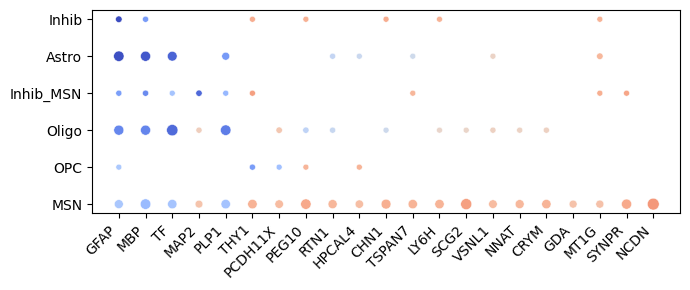

In [21]:

from scipy.stats import pearsonr

data_list = []
for cell_type in sm_adata.obs['Cell_Type'].unique():    
    df = sm_adata[sm_adata.obs['Cell_Type'] == cell_type].obs
    if df.shape[0] == 0:
        continue
    for gene in SMA_cor_df['gene'].tolist():
        if gene not in df.columns:
            continue
        corr, p_value = pearsonr(df[dopamine], df[gene])
        data_list.append((cell_type, 'Dopamine', gene, corr, p_value))
cor_df = pd.DataFrame(data_list, columns=['Cell Type', 'dopamine', 'gene', 'rho', 'Pvalue'])
cor_df['Method'] = 'SCRoFit'
cor_df = cor_df[cor_df['Pvalue'] < 0.05]
cor_df['InvLog10Pvalue'] = -np.log10(cor_df['Pvalue'])


fig = plt.figure(figsize=(7,3)) 
z = cor_df['rho']
norm = Normalize(vmin=-np.max(np.abs(z)), vmax=np.max(np.abs(z)))

sns.scatterplot(
    data=cor_df.sort_values(by='rho'), 
    y="Cell Type", x="gene", 
    #order=['Cd(SCRoFit)', 'Cd(SMA)', 'CI(SCRoFit)', 'ACB', 'SCRoFit'],
    hue='rho', hue_norm=norm,
    size='InvLog10Pvalue',
    palette='coolwarm'
)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(False)  # Hide the legend
plt.tight_layout()
plt.show()



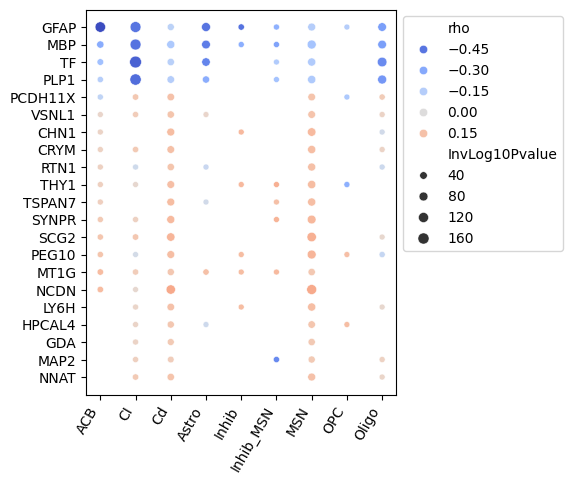

In [22]:
bench_cor_df['Annotation'] = bench_cor_df['Region']
bench_cor_df['Function Annotation'] = 'Region'
cor_df['Annotation'] = cor_df['Cell Type']
cor_df['Function Annotation'] = 'Cell Type'

cols = ['Function Annotation', 'Annotation', 'dopamine', 'gene', 'rho', 'Pvalue', 'Method',
       'InvLog10Pvalue']
df = pd.concat([bench_cor_df[cols], cor_df[cols]])
df = df.sort_values(by=['Function Annotation', 'Annotation', 'rho'], ascending=[False, True, True])
z = df['rho']
norm = Normalize(vmin=-np.max(np.abs(z)), vmax=np.max(np.abs(z)))

fig = plt.figure(figsize=(4,5)) 
sns.scatterplot(
    data=df[df['Method'] == 'SCRoFit'], 
    x="Annotation", y="gene", 
    #order=['Cd(SCRoFit)', 'Cd(SMA)', 'CI(SCRoFit)', 'ACB', 'SCRoFit'],
    hue='rho', hue_norm=norm,
    size='InvLog10Pvalue',
    palette='coolwarm'
)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=60, ha='right')
#plt.legend().set_visible(False)  # Hide the legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.show()


/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 5 x 4 in image.
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: spatial_cor.pdf


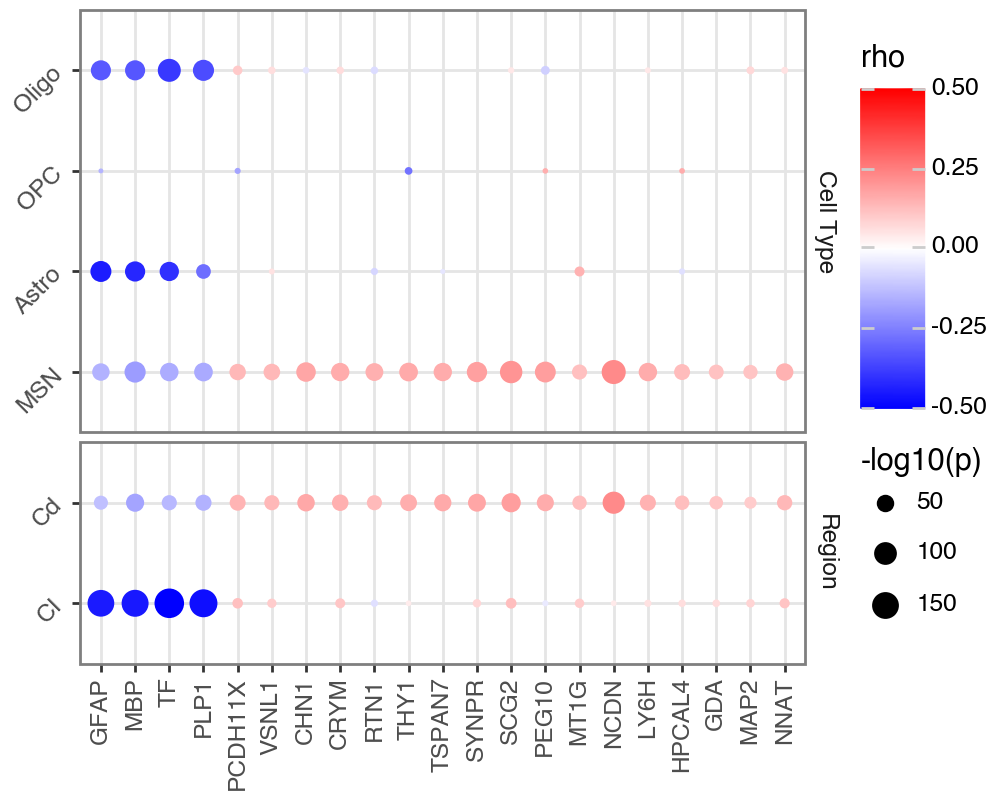

In [24]:
import pandas as pd
import numpy as np
from plotnine import *

df = df.sort_values(
    by=['Function Annotation', 'Annotation', 'rho'],
    ascending=[False, True, True]
).copy()

df['gene'] = pd.Categorical(df['gene'], categories=df['gene'].unique(), ordered=True)
df = df[df['Annotation'].isin(['CI', 'Cd', 'MSN', 'Astro', 'OPC', 'Oligo'])]
df['Annotation'] = pd.Categorical(df['Annotation'],categories=['CI', 'Cd', 'MSN', 'Astro', 'OPC', 'Oligo'],ordered=True)

max_abs = df['rho'].abs().max()
p = (
    ggplot(df[df['Method'] == 'SCRoFit'],
           aes(y='Annotation', x='gene',
               color='rho',
               size='InvLog10Pvalue'))
    + facet_grid('Function Annotation ~ .', 
                 scales='free', space='free')
    + geom_point()
    + scale_color_gradient2(
        low="blue", mid="white", high="red",
        midpoint=0,
        limits=(-max_abs, max_abs)
      )
    + scale_size_area(max_size=5)
    + theme_bw()
    + theme(
        figure_size=(5, 4),  
        axis_text_y=element_text(angle=45, hjust=1),
        axis_text_x=element_text(angle=90, hjust=-1),
        strip_background=element_blank(),
      )
    + labs(
        color='rho',
        size='-log10(p)',
        x='',
        y=''
      )   
)
p.save('spatial_cor.pdf')
p

In [25]:
st_adata[st_adata.obs['Region'] == 'ACB'].obsm['spatial_rir'].copy().min(axis=0), \
st_adata[st_adata.obs['Region'] == 'ACB'].obsm['spatial_rir'].copy().max(axis=0)

(array([  5396, 107920]), array([ 42228, 157478]))

<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


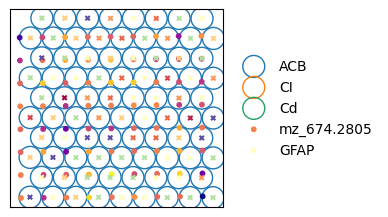

In [26]:
%autoreload

x_min = 17000
x_max = x_min + 5000
y_min = 120000
y_max = y_min + 5000
# Usage example
pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805", 
    gene="GFAP",
    cell_type_col="Region",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    gene_dot_size=10,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4, 4),
    st_cmap=None,
    g_cmap='Spectral_r',
    m_cmap='plasma',
    out_fn='ccs_zoom_GFAP_region.pdf'
)

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

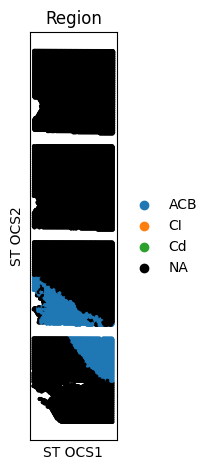

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


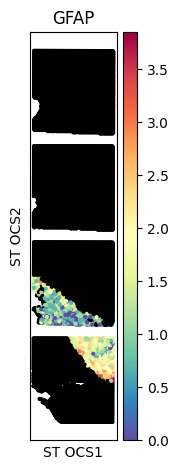

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

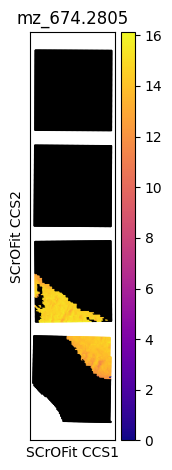

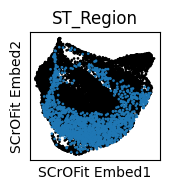

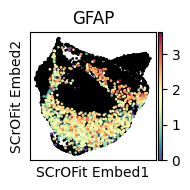

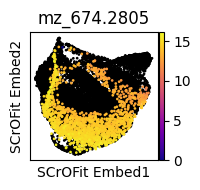

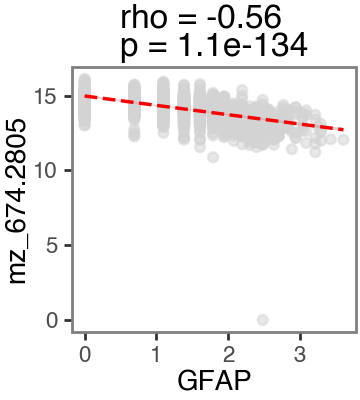

In [28]:
%autoreload

pl.plot_gene_cell_type(st_adata, mdata, 'GFAP', 'Region', 'ACB')


[25120  3341] [ 42534 131249]


<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


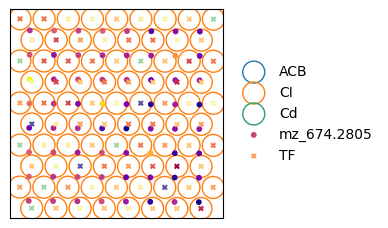

In [29]:
print(st_adata[st_adata.obs['Region'] == 'CI'].obsm['spatial_rir'].copy().min(axis=0), \
st_adata[st_adata.obs['Region'] == 'CI'].obsm['spatial_rir'].copy().max(axis=0))

x_min = 30120
x_max = x_min + 5000
y_min = 80000
y_max = y_min + 5000

pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805", 
    gene="TF",
    cell_type_col="Region",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    gene_dot_size=10,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4, 4),
    st_cmap=None,
    g_cmap='Spectral_r',
    m_cmap='plasma',
    out_fn='ccs_zoom_CI_TF_mz_674.2805.pdf'
)

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

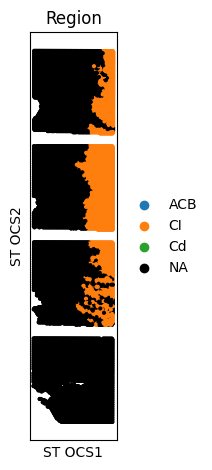

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


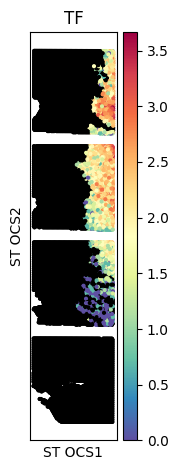

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

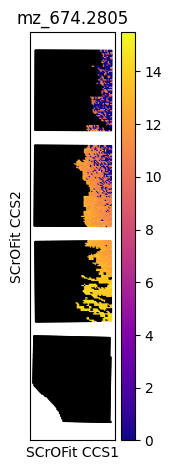

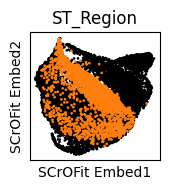

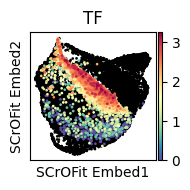

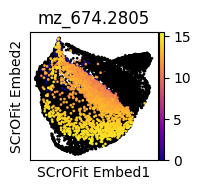

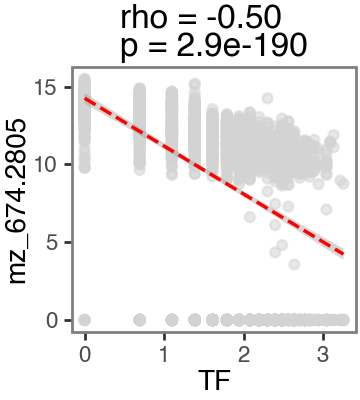

In [30]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'TF', 'Region', 'CI')

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

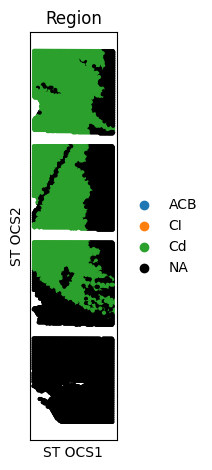

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


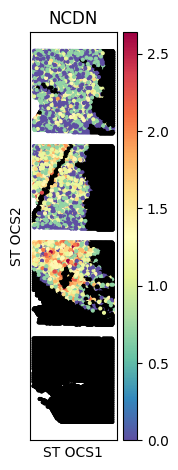

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

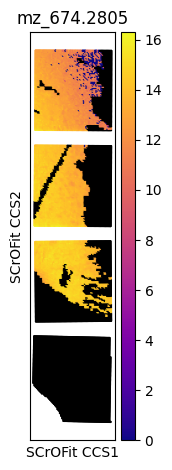

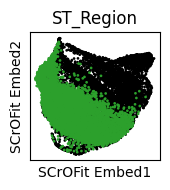

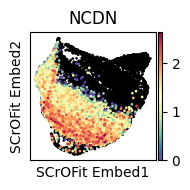

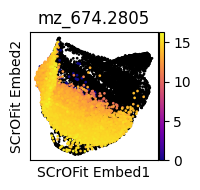

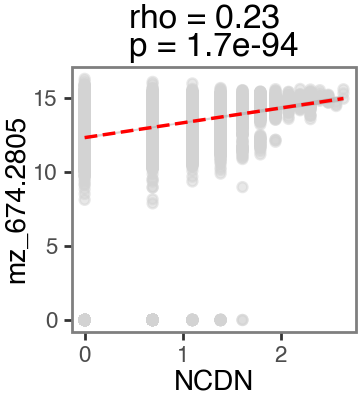

In [31]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'NCDN', 'Region', 'Cd')

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

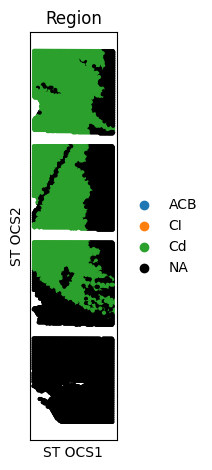

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


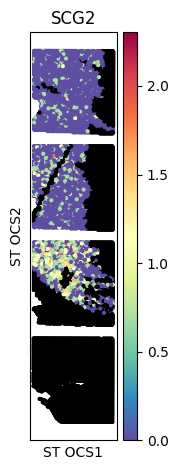

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

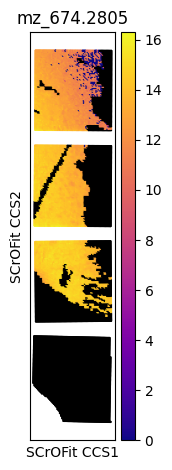

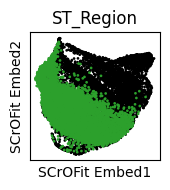

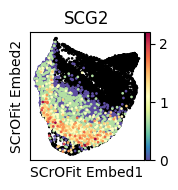

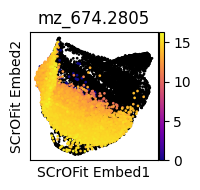

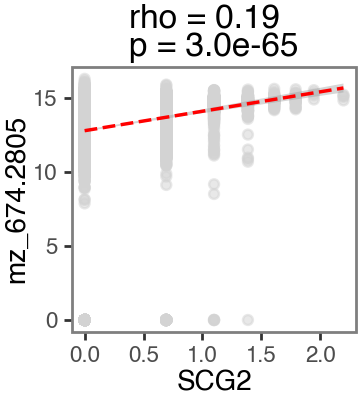

In [32]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'SCG2', 'Region', 'Cd')

[5256 3777] [ 42121 176669]


<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


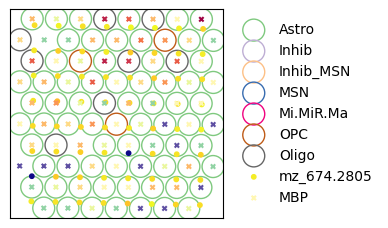

In [33]:
%autoreload
print(st_adata[st_adata.obs['Cell_Type'] == 'Astro'].obsm['spatial_rir'].copy().min(axis=0), \
st_adata[st_adata.obs['Cell_Type'] == 'Astro'].obsm['spatial_rir'].copy().max(axis=0))

x_min = 15000
x_max = x_min + 5000
y_min = 150000
y_max = y_min + 5000
# Usage example
pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805", 
    gene="MBP",
    cell_type_col="Cell_Type",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    gene_dot_size=10,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4, 4),
    st_cmap='Accent',
    g_cmap='Spectral_r',
    m_cmap='plasma',
    out_fn='ccs_zoom_Astro_MBP_mz_674.2805.pdf'
)

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

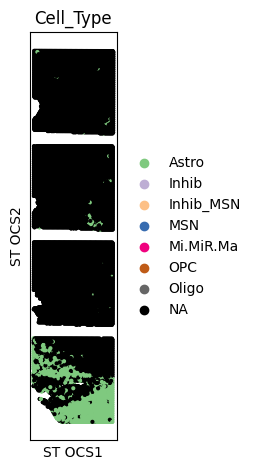

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


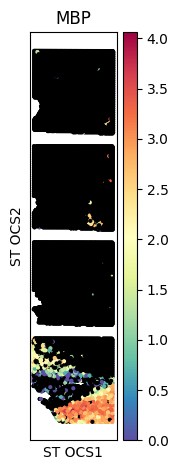

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

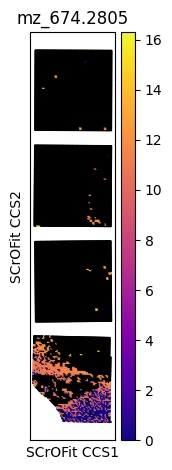

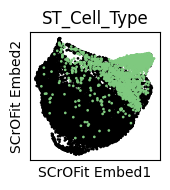

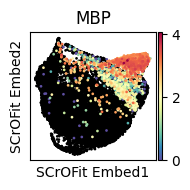

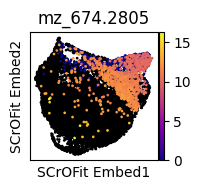

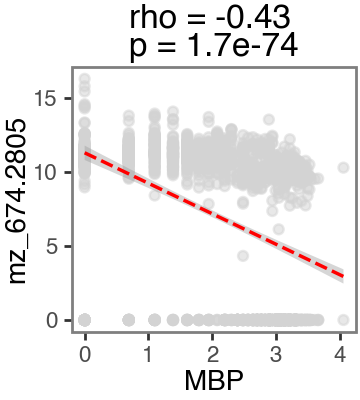

In [34]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'MBP', 'Cell_Type', 'Astro')


<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

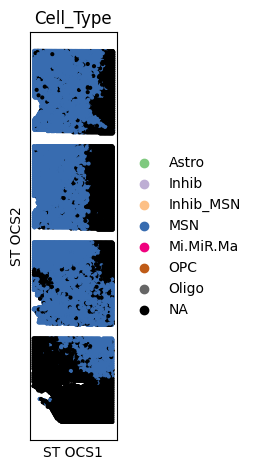

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


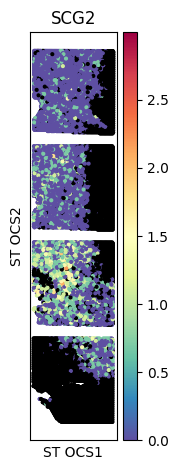

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

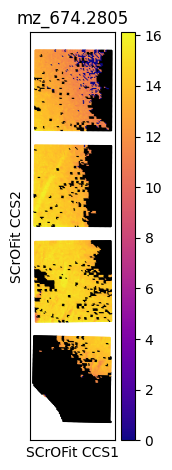

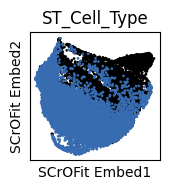

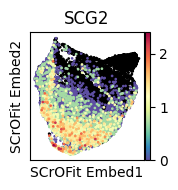

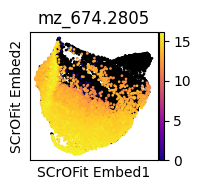

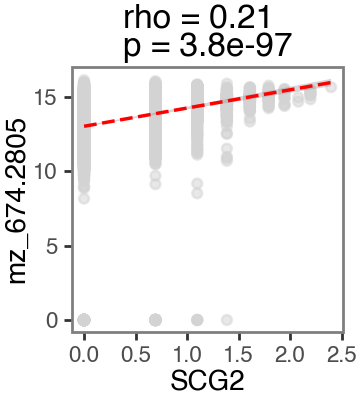

In [35]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'SCG2', 'Cell_Type', 'MSN')

[5373 3267] [ 42275 167991]


<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


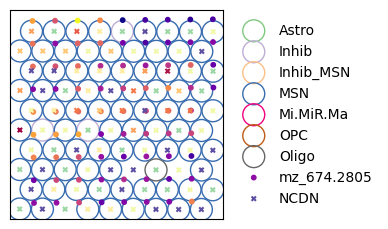

In [36]:
%autoreload
print(st_adata[st_adata.obs['Cell_Type'] == 'MSN'].obsm['spatial_rir'].copy().min(axis=0), \
st_adata[st_adata.obs['Cell_Type'] == 'MSN'].obsm['spatial_rir'].copy().max(axis=0))

x_min = 25120  
x_max = x_min + 5000
y_min = 100000
y_max = y_min + 5000
# Usage example
pl.ccs_spatial_zoom(
    st_adata, mdata,
    metabolite="mz_674.2805", 
    gene="NCDN",
    cell_type_col="Cell_Type",
    st_coord_key="spatial_rir",
    sm_coord_key="SM_spatial_rir",
    cell_dot_size=250,
    gene_dot_size=10,
    x_min=x_min, x_max=x_max, 
    y_min=y_min, y_max=y_max,
    figsize=(4, 4),
    st_cmap='Accent',
    g_cmap='Spectral_r',
    m_cmap='plasma',
    out_fn='ccs_zoom_MSN_NCDN_mz_674.2805.pdf'
)

<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

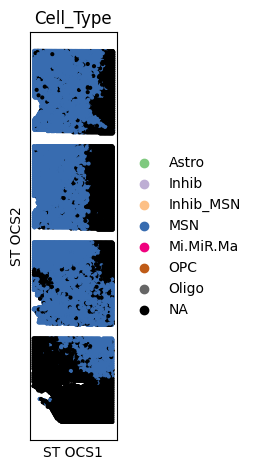

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


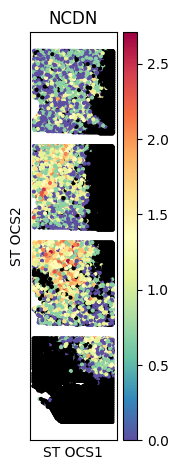

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

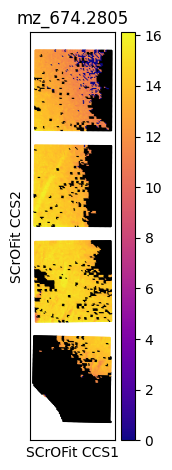

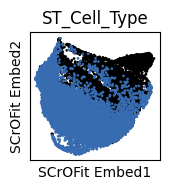

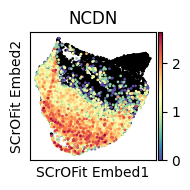

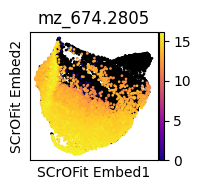

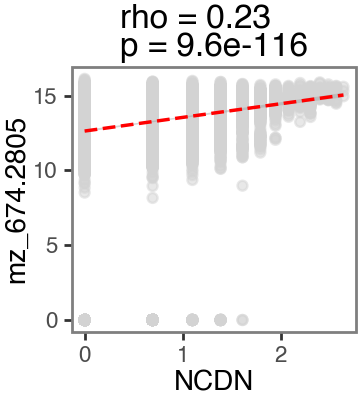

In [37]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'NCDN', 'Cell_Type', 'MSN')


<string>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' wi

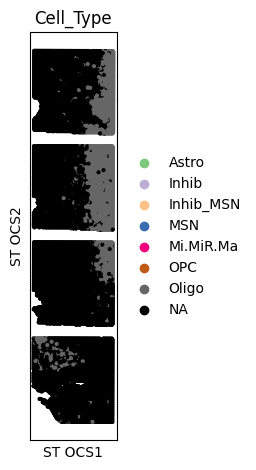

<string>:9: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.


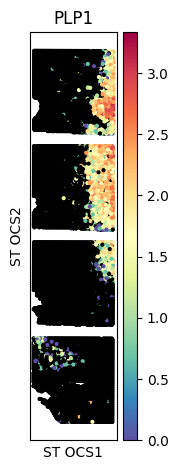

/Users/chenlingxi/miniconda3/envs/dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
<string>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

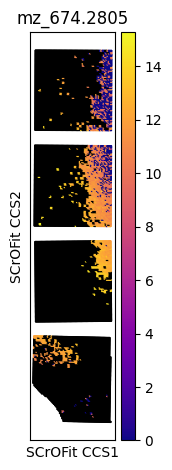

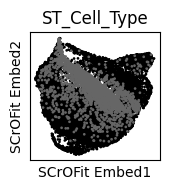

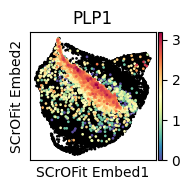

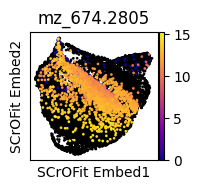

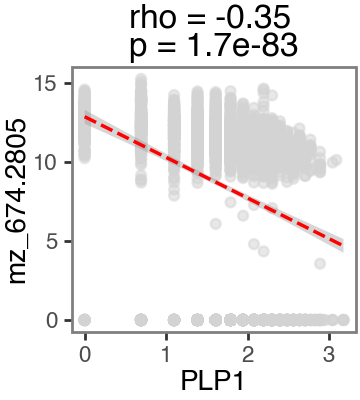

In [38]:
%autoreload
pl.plot_gene_cell_type(st_adata, mdata, 'PLP1', 'Cell_Type', 'Oligo')

In [39]:
bench_cor_df[bench_cor_df['gene'].isin(['GFAP', 'TF', 'NCDN', 'SCG2', 'MBP', 'PLP1'])]

Region  dopamine  gene       rho         Pvalue   Method          Type  \
348       Cd  Dopamine  NCDN  0.244814  8.910519e-101      SMA       Cd(SMA)   
2368      Cd  Dopamine  SCG2  0.326443  4.317302e-182      SMA       Cd(SMA)   
3064      Cd  Dopamine    TF -0.234649   1.659563e-92      SMA       Cd(SMA)   
11788     Cd  Dopamine  GFAP -0.262491  4.203159e-116      SMA       Cd(SMA)   
12343     Cd  Dopamine   MBP -0.246967  1.403670e-102      SMA       Cd(SMA)   
14624     Cd  Dopamine  PLP1 -0.233789   7.979968e-92      SMA       Cd(SMA)   
0         Cd  Dopamine  NCDN  0.232060   1.737992e-94  SCRoFit   Cd(SCRoFit)   
5         Cd  Dopamine  SCG2  0.192807   2.956723e-65  SCRoFit   Cd(SCRoFit)   
7         Cd  Dopamine    TF -0.139372   1.220900e-34  SCRoFit   Cd(SCRoFit)   
15        Cd  Dopamine  GFAP -0.125049   3.667300e-28  SCRoFit   Cd(SCRoFit)   
16        Cd  Dopamine   MBP -0.178574   4.341583e-56  SCRoFit   Cd(SCRoFit)   
20        Cd  Dopamine  PLP1 -0.151670   8.900975e-41  SCRoFit   Cd(SCRoFit)   
21        CI  Dopamine  NCDN  0.040255   2.859989e-02  SCRoFit   CI(SCRoFit)   
26        CI  Dopamine  SCG2  0.129088   1.839477e-12  SCRoFit   CI(SCRoFit)   
28        CI  Dopamine    TF -0.503951  2.912170e-190  SCRoFit   CI(SCRoFit)   
36        CI  Dopamine  GFAP -0.453098  1.153272e-149  SCRoFit   CI(SCRoFit)   
37        CI  Dopamine   MBP -0.457587  5.602338e-153  SCRoFit   CI(SCRoFit)   
41        CI  Dopamine  PLP1 -0.475458  1.132699e-166  SCRoFit   CI(SCRoFit)   
42       ACB  Dopamine  NCDN  0.173216   1.763107e-12  SCRoFit  ACB(SCRoFit)   
47       ACB  Dopamine  SCG2  0.133786   5.637002e-08  SCRoFit  ACB(SCRoFit)   
49       ACB  Dopamine    TF -0.211509   5.436318e-18  SCRoFit  ACB(SCRoFit)   
57       ACB  Dopamine  GFAP -0.558419  1.059766e-134  SCRoFit  ACB(SCRoFit)   
58       ACB  Dopamine   MBP -0.292058   1.629507e-33  SCRoFit  ACB(SCRoFit)   
62       ACB  Dopamine  PLP1 -0.144015   4.935206e-09  SCRoFit  ACB(SCRoFit)   

       InvLog10Pvalue Annotation Function Annotation  
348        100.050097         Cd              Region  
2368       181.364788         Cd              Region  
3064        91.780006         Cd              Region  
11788      115.376424         Cd              Region  
12343      101.852735         Cd              Region  
14624       91.097999         Cd              Region  
0           93.759952         Cd              Region  
5           64.529189         Cd              Region  
7           33.913320         Cd              Region  
15          27.435654         Cd              Region  
16          55.362352         Cd              Region  
20          40.050562         Cd              Region  
21           1.543636         CI              Region  
26          11.735306         CI              Region  
28         189.535783         CI              Region  
36         148.938068         CI              Region  
37         152.251631         CI              Region  
41         165.945886         CI              Region  
42          11.753721        ACB              Region  
47           7.248952        ACB              Region  
49          17.264695        ACB              Region  
57         133.974790        ACB              Region  
58          32.787944        ACB              Region  
62           8.306695        ACB              Region